<h1 style="text-align: center;">TensorFlow</h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt

seed = 7777
tf.random.set_seed(seed)

In [2]:
import warnings
import re

# Solo filtra la advertencia específica sobre input_shape en Sequential
warnings.filterwarnings(
    "ignore",
    message=re.escape("Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead."),
    category=UserWarning
)

# Tensores y variables
TensorFlow opera en arreglos multidimensionales o **tensores** representados como objetos `tf.Tensor`.
Tiene las caracterisiticas de:
* `Tensor.shape`: te dice las dimensiones de estos *tensores*.
    * ⚠️ Deben ser matrices rectangulares
* `Tensor.dtype`: te dice el tipo de todos los elementos del *tensor.
    * ⚠️ Todos los valores deben ser del mismo tipo


 Estos *tensores* son *matrices multidimensionales* que ademas se comportan de una forma muy parecida a los de `nunpy`:

* Con respecto a los cálculos matemáticos:

| Tipo de cálculo / operación            | ¿Es similar? | NumPy (`np.ndarray`)      | TensorFlow (`tf.Tensor`)                                      | Notas                               |
| -------------------------------------- | ------------ | ------------------------- | ------------------------------------------------------------- | ----------------------------------- |
| **Suma de arrays/matrices**            | ✅ Sí         | `a + b`                   | `a + b`                                                       | Idéntica                            |
| **Resta de arrays/matrices**           | ✅ Sí         | `a - b`                   | `a - b`                                                       | Idéntica                            |
| **Multiplicación elemento a elemento** | ✅ Sí         | `a * b`                   | `a * b`                                                       | Igual                               |
| **Producto matricial (dot product)**   | ✅ Sí         | `np.dot(a, b)`            | `tf.matmul(a, b)`                                             | Función diferente                   |
| **Transposición**                      | ✅ Sí         | `a.T` o `np.transpose(a)` | `tf.transpose(a)`                                             | Sintaxis parecida                   |
| **Slicing / Indexing**                 | ✅ Sí         | `a[0, :]`                 | `a[0, :]`                                                     | Idéntica                            |
| **Broadcasting**                       | ✅ Sí         | Automático                | Automático                                                    | Muy parecido                        |
| **Suma por ejes (axis)**               | ✅ Sí         | `np.sum(a, axis=0)`       | `tf.reduce_sum(a, axis=0)`                                    | Funciones distintas                 |
| **Mean / promedio**                    | ✅ Sí         | `np.mean(a)`              | `tf.reduce_mean(a)`                                           | Diferente nombre                    |
| **Varianza / desviación típica**       | ✅ Sí         | `np.var(a)`               | `tf.math.reduce_variance(a)`                                  | TF usa `tf.math`                    |
| **Funciones trigonométricas**          | ✅ Sí         | `np.sin(a)`               | `tf.math.sin(a)`                                              | Misma lógica                        |
| **Funciones log, exp, sqrt, etc.**     | ✅ Sí         | `np.log(a)`               | `tf.math.log(a)`                                              | Prefijo `math.`                     |
| **Reshape / cambio de forma**          | ✅ Sí         | `a.reshape((2, 4))`       | `tf.reshape(a, (2, 4))`                                       | Igual                               |
| **Stack / concat / split**             | ✅ Sí         | `np.concatenate([...])`   | `tf.concat([...])`                                            | Igual lógica                        |
| **Argmax / argmin**                    | ✅ Sí         | `np.argmax(a)`            | `tf.argmax(a)`                                                | Igual                               |
| **Sort / argsort**                     | ✅ Sí         | `np.sort(a)`              | `tf.sort(a)`                                                  | Igual                               |
| **Boolean masking / filtrado**         | ✅ Sí         | `a[a > 0]`                | `tf.boolean_mask(a, a > 0)`                                   | Similar pero con función específica |
| **Operaciones en GPU**                 | ❌ No         | ❌ No                      | ✅ Sí (automático)                                             | Gran diferencia                     |
| **Autodiferenciación (gradientes)**    | ❌ No         | ❌ No                      | ✅ Sí (`tf.GradientTape`)                                      | Solo TF                             |
| **Ejecución simbólica / gráfica**      | ❌ No         | ❌ No                      | ✅ Sí (modo gráfico o eager)                                   | Solo TF                             |
| **Mutabilidad (modificar valores)**    | ❌ No         | ✅ Sí (`a[0,0] = 5`)       | ❌ No (`tf.Tensor` es inmutable)                               | Solo mutable en NumPy               |
| **Conversión a lista**                 | ✅ Sí         | `a.tolist()`              | `a.numpy().tolist()`                                          | En TF necesitas `.numpy()` primero  |
| **Guardar en disco (formato nativo)**  | ✅ Similar    | `np.save()` / `np.load()` | `tf.saved_model` (modelos), o `.numpy()` para exportar arrays | Diferente enfoque                   |

Y con respecto a sus caracteristicas:

| Característica                   | **NumPy array**            | **TensorFlow tensor**                         |
| -------------------------------- | -------------------------- | --------------------------------------------- |
| Tipo                             | `numpy.ndarray`            | `tf.Tensor`                                   |
| Biblioteca                       | NumPy                      | TensorFlow                                    |
| Uso principal                    | Cálculo científico general | Computación automática (ML/DL)                |
| Soporte para GPU                 | ❌ No (solo CPU)            | ✅ Sí (GPU, TPU, CPU)                          |
| Diferenciación automática        | ❌ No                       | ✅ Sí (con `tf.GradientTape`)                  |
| Computación simbólica            | ❌ No                       | ✅ Sí (gráficos computacionales)               |
| Inmutabilidad                    | ✅ Mutable                  | ⚠️ Inmutable (no puedes cambiar su contenido) |
| Integración con redes neuronales | ❌ No directo               | ✅ Nativo (keras, optimizers, etc.)            |


## Tensor constants

In [3]:
# scalar
scalar = tf.constant(18)
print(scalar)
print(scalar.shape)

# Vector
vector = tf.constant([17, 12])
print(vector)
print(vector.shape)

# Matrices
matrix = tf.constant([[1, 2],
                      [3, 4]])
print(matrix)
print(matrix.shape)

# Tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]]])

tf.Tensor(18, shape=(), dtype=int32)
()
tf.Tensor([17 12], shape=(2,), dtype=int32)
(2,)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
(2, 2)


# First Neural Network in Keras

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Input
Para definir la usamos el objeto `Input`. Debe ser el numero de variables independientes.
* `shape`: dimensión de entrada, tiene que estar en el formato de (input_dimension,)

## Dense
Podemos crear capas *completamente conectadas* usando la clase `Dense`.
Tiene lso siguientes parametros:
* `units`: Número de neuronas en esa capa.
* `activation`: Función de activación que usaremos. Por defecto está la función *lineal* .
* `name`: Es interesante poner el nombre de cada capa para poder identificarlas.
* `input_shape`: En caso de no querer usar el objeto `Input`, podemos incluir una primera capa que tenga este atributo.

## Sequential
El objeto `Sequential` <u> es donde vamos a crear nuestra red neuronal </u>. Tenemos dos formas para crearlo:
1. * Crear el objeto
    * Vamos añadiendo las capas con el método **.add** a nuestro objeto
    * Recordar que la primera capa debe ser `Input` o `Dense`(con el atributo de *input_shape*)
2. * Podemos guardar directamente el modelo con todas las capas guardadas en una lista.
    * Además también se pueden añadir más capas.

In [5]:
model1 = keras.Sequential()
model1.add(layers.Dense(3, activation="sigmoid", name="input_lay", input_shape=(2,)))
model1.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

model2 = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(3, activation="sigmoid", name="input_layer"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
])

# Guardar y cargar modelos de Keras
## Guardar modelo
Puedes guardar facilmente tu modelo entero (arquitectura, pesos, optimizer state) usando el método `save` y ponemos el nombre del archivo que lo queremos guardar, importante poner el sufijo ".keras" o ".h5".
* .keras: El modo recomnedado y por defecto para TenserFlow 2.12. Incluye metadata del modelo y es "future-proof".
* .h5: Es muy usado y es muy simple.

`model1.save("Modelo_Keras.keras")`

`model1.save("Modelo2_Keras.h5")`

## Cargar un modelo.
Simplemente debemos llamar a la funcion `load_model` y escribir el nombre del archivo donde esté guardado el modelo


In [6]:
from tensorflow.keras.models import load_model

# modelo_cargado = load_model("Modelo_Keras.keras")

# MNIST

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

seed = 7777
tf.random.set_seed(seed)

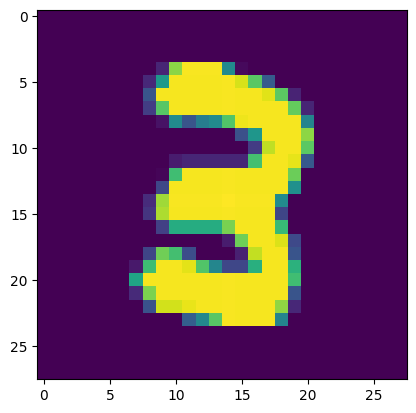

In [8]:
# Cargo el datset
mnist = tf.keras.datasets.mnist

# Pongo los valores de train y test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Como son valores de 0 a 255 puedo normalizarlo dividiendo entre 255
X_train, X_test = X_train/255.0, X_test/255.0

i_rand = np.random.randint(0, len(X_train))
plt.imshow(X_train[i_rand])
plt.show()

Ahora vamos a hacer más pequeño nuestro dataset de test para que tengamos aun mas **OVERFITTING**.
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import train_test_split

_, X, _, y = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)

## Creación del modelo
Vamos a crear un modelo que sea capaz de generalizar. Nuestro modelo consistirá en :
* Input de dimensión 28,28
* Capa de flatten (para así tener los datos en una lista)
* 3 Dense hidden layer
* Output layer con una sola neurona

In [10]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(128, activation="relu", name="layer_2")(l_1)
l_3 = layers.Dense(128, activation="relu", name="layer_3")(l_2)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(l_3)

# Definimos el modelo
model = keras.Model(inputs=inputs, outputs=outputs, name="try_not_overfit")

model.summary()


Model: "try_not_overfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

Ahora usaremos la siguiente configuración para entrenar:

In [11]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
                    X, y,
                    batch_size=64,
                    epochs=100,
                    validation_split=0.2,
                    shuffle=True
)
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6989 - loss: 0.9992 - val_accuracy: 0.9150 - val_loss: 0.2950
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9358 - loss: 0.2369 - val_accuracy: 0.9396 - val_loss: 0.2138
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.1419 - val_accuracy: 0.9475 - val_loss: 0.1914
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0947 - val_accuracy: 0.9467 - val_loss: 0.1996
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9815 - loss: 0.0704 - val_accuracy: 0.9521 - val_loss: 0.1840
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9854 - loss: 0.0494 - val_accuracy: 0.9408 - val_loss: 0.2330
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9479 - val_loss: 0.2097
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0262 - val_acc

Ahora vamos a evaluar los valores en cada *epoch* de la función de perdida y la *accuracy*

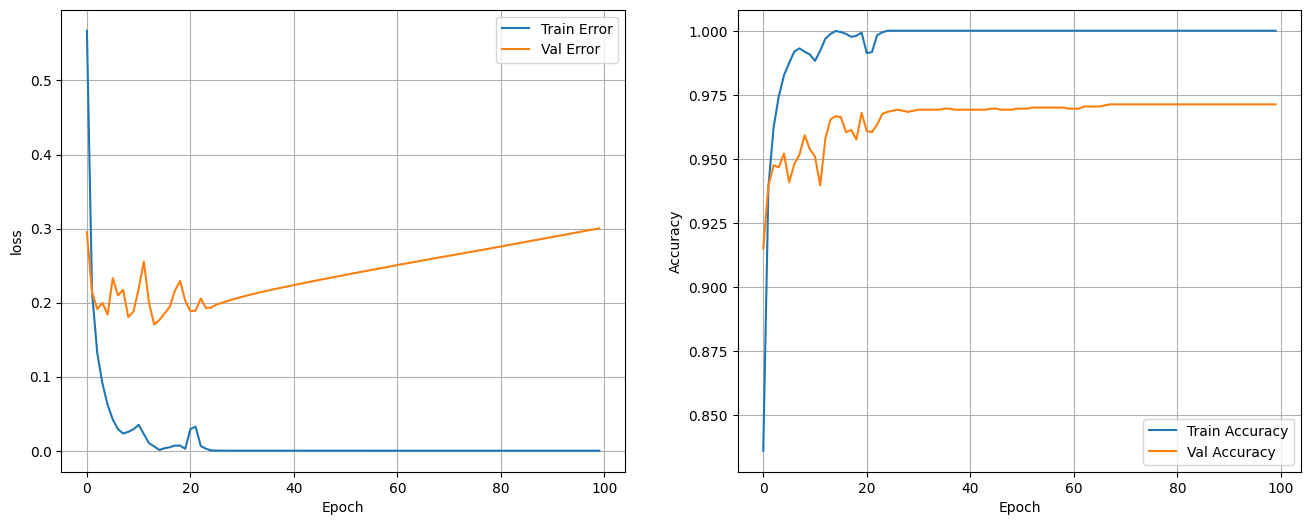

In [12]:
def show_loss_accuracy_evolution(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("loss")
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(history)

## Crear un modelo mas simple
Una de las formas para prevenir el sobreajuste es creando un modelo más sencillo -> crear un modelo con menos numero de paramtros -> el cuál está determinado por el número de neuronas por capa.

Un modelo más complejo es capaz de aprender casi cualquier cosa de los datos de entrenamiento: **INCLUSO LA ALEATORIEDAD**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0952 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0946 - loss: nan - val_accuracy: 0.1053 - val_loss: nan
Epoch 9/100
141/141 ━━━━━━━

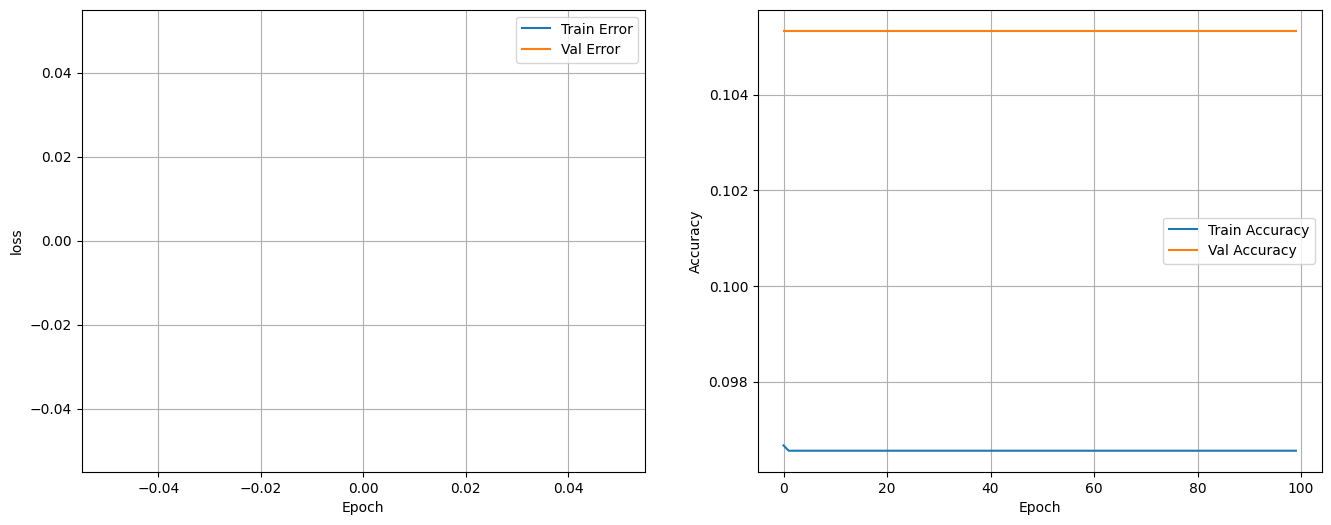

In [13]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(8, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(8, activation="relu", name="layer_2")(l_1)

outputs = layers.Dense(1, activation="softmax", name="output_layer")(l_2)

# Definimos el modelo
model_simpler = keras.Model(inputs=inputs, outputs=outputs, name="try_not_overfit")
model_simpler.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_simpler = model_simpler.fit(X,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.25,
                                    shuffle=True)

show_loss_accuracy_evolution(history_simpler)

## Reduciendo el `batch_size`
Otro método es disminuyendo el tamaño del *batch* durante el *gradient descent* para así tener más incertidumbre a la hora de estimar los **parametros del gradiente**


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (16, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0971 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0978 - loss: nan - val_accuracy: 0.1075 - val_loss: nan
Epoch 9/100
600/600 ━━━━━━━━

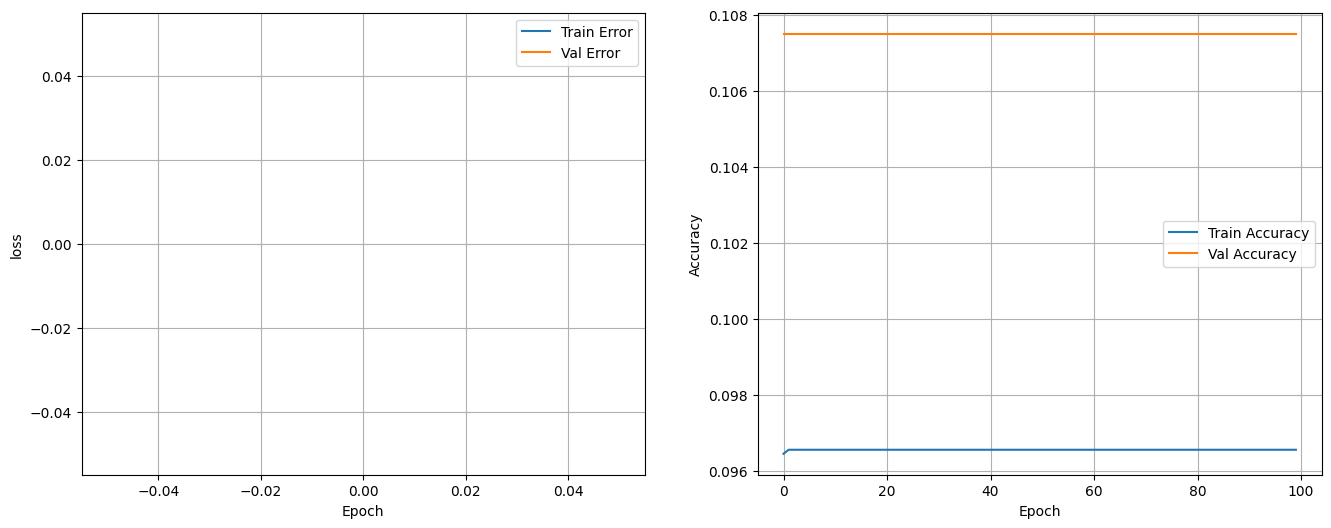

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Test Loss: nan
Test Accuracy: 0.09799999743700027


In [14]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(128, activation="relu", name="layer_2")(l_1)
l_3 = layers.Dense(128, activation="relu", name="layer_3")(l_2)

outputs = layers.Dense(1, activation="softmax", name="output_layer")(l_3)

model = keras.Model(inputs=inputs, outputs=outputs, name="try_not_overfit")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)
show_loss_accuracy_evolution(history_2)


results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

## Dropout
Este método se aplica a una (o varias capas), y consiste en *"dropping out"* un número de neuronas de la capa. Para crear una capa que tenga *dropout* tendremos que usar el objeto `Dropout`.
* `rate`: float entre [0, 1], indica la fracción de las neuronas que se van a "dropout"
* `noise_shape`:
* `seed`: semilla

⚪ Objeto
tf.keras.layers.Dropout(0.3, seed=seed)

⚪ Con functional API
prev_layer = layers.Dense(2)
layer = layers.Dropout(0.3, seed=seed)(prev_layer)

⚪ Con `Sequential`
model.add(layers.Dropout(0.3, seed=seed))

Por ello, en nuestro ejemplo nos quedará:

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2038 - loss: 2.2067 - val_accuracy: 0.7558 - val_loss: 0.8685
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5837 - loss: 1.1963 - val_accuracy: 0.8587 - val_loss: 0.5270
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.8882 - val_accuracy: 0.8883 - val_loss: 0.4246
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 0.7251 - val_accuracy: 0.8933 - val_loss: 0.3763
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.6647 - val_accuracy: 0.8979 - val_loss: 0.3281
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.5917 - val_accuracy: 0.9133 - val_loss: 0.3029
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.5399 - val_accuracy: 0.9212 - val_loss: 0.2745
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.5144 - val_accu

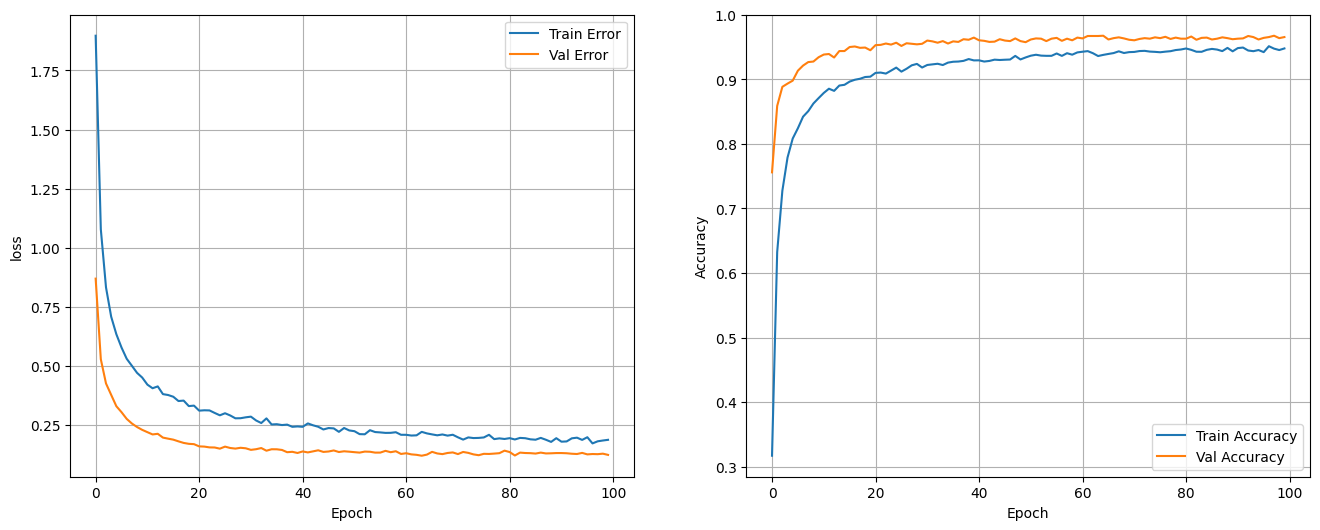

In [16]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)
flat = layers.Dropout(0.5, name='dropout_flat')(flat)

l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5, name='dropout_l3')(l_3)


outputs = layers.Dense(10, activation='softmax',
                       name='output_layer')(l_3)


model_dropout = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout')
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)

show_loss_accuracy_evolution(history_dropout)

## Batch Normalization
`BatchNormalization` aplica una transformación que hace que la salida tenga una media cerca de 0 y una std deviation cerca de 1

Model: "dont_overfit_model_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,194 (989.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7432 - loss: 0.8163 - val_accuracy: 0.8983 - val_loss: 0.4473
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9526 - loss: 0.1565 - val_accuracy: 0.9388 - val_loss: 0.2086
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0627 - val_accuracy: 0.9442 - val_loss: 0.1809
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0230 - val_accuracy: 0.9504 - val_loss: 0.1677
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0112 - val_accuracy: 0.9529 - val_loss: 0.1862
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0066 - val_accuracy: 0.9583 - val_loss: 0.1613
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9600 - val_loss: 0.1584
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.6309e-04 - val_

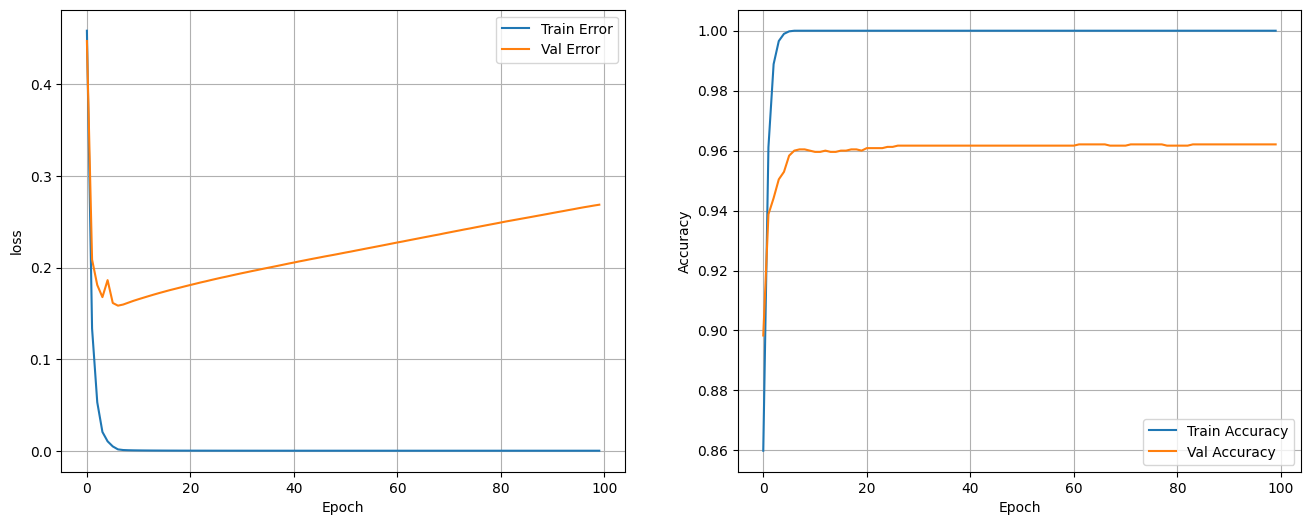

In [17]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)


l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)


outputs = layers.Dense(10, activation='softmax',
                       name='output_layer')(l_3)


model_batch_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_batch_norm')
model_batch_norm.summary()
model_batch_norm.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_batch_norm = model_batch_norm.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)

show_loss_accuracy_evolution(history_batch_norm)

## Layer Normalization
`LayerNormalization` es otro tipo de normalización. A diferencia de `BatchNormalization`, esto normaliza los datos a traves de todas las *features* y no depende del tamaño del *batch*, siendo así efectivo para *training* e *inferencia*.
Calcula la media y la varianza

Model: "dont_overfit_model_layer_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,426 (986.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7600 - loss: 0.7594 - val_accuracy: 0.9304 - val_loss: 0.2342
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9501 - loss: 0.1721 - val_accuracy: 0.9467 - val_loss: 0.1973
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.0960 - val_accuracy: 0.9454 - val_loss: 0.1863
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9854 - loss: 0.0538 - val_accuracy: 0.9450 - val_loss: 0.1911
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9879 - loss: 0.0440 - val_accuracy: 0.9417 - val_loss: 0.2253
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0371 - val_accuracy: 0.9467 - val_loss: 0.2064
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0277 - val_accuracy: 0.9454 - val_loss: 0.2145
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0326 - val_acc

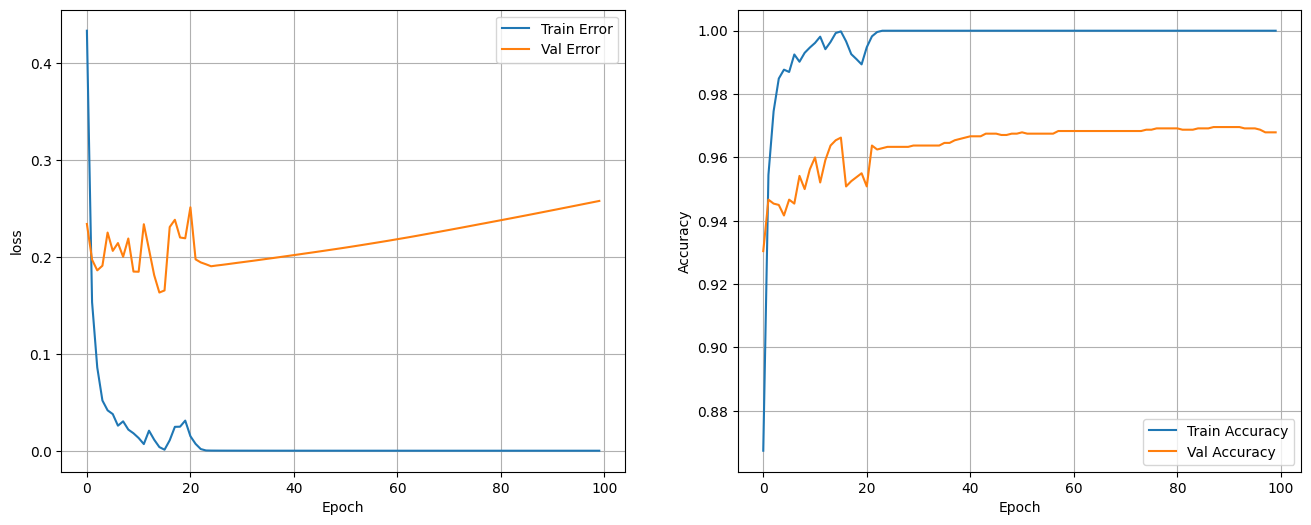

In [18]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(l_3)

model_layer_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_layer_norm')
model_layer_norm.summary()
model_layer_norm.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_layer_norm = model_layer_norm.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)

show_loss_accuracy_evolution(history_layer_norm)

## L1, L2 y ElasticNet
Es importante tener en cuenta que durante el entrenamiento la red aprende una configuración de pesos y bias que permite mejorar los resultados para una determianda función de pérdida.
* L1 regularization: donde el coste añadido es proporcional al valor absoluto de los coeficientes de los pesos.
* L2 regularization: donde el coste añadido es proporcional al cuadrado de los pesos delos coeficientes.
* L1_L2 or ElasticNet.

In [19]:
from tensorflow.keras import regularizers

kerner_regularizer_l1 = regularizers.l1_l2(l1=1e-5, l2=5e-4)
kerner_regularizer_l2 = regularizers.l2(5e-4)
kerner_regularizer_l3 = regularizers.l1(1e-5)

l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l1, name='layer_1')(flat)

l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)

l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l3, name='layer_3')(l_2)

Además se pueden elegir donde quieres incluir la penalización:
* `kernel_regularizer`: solo en los weights
* `bias_regularizer`: solo en los bias
* `activity_regularizer`: on full output

## Noise injection
Aplicamos un ruido de tipo Gaussiano con media 0. Podemos elegir nosotros la varianza.

* Con API.

next_layer = layers.GaussianNoise(stddev)(prev_layer)

* Con secuencial

model.add(layers.GaussianNoise(stddev)())

## Early stopping
Una de las tecnicas mas usadas para prevenir el *overfitting* es la de **parado temprano**. Basicamente consiste en parar el entrenamiento en una *Epoch* anterior a la que tenemos definida.
Se usará el objeto `EarlyStopping`
* `monitor`: el nombre del valor que va a ser monitorizado.
* `patience`: Número de *Epochs* <u>sin que se muestre mejora</u> en el cual se parará el entrenamiento.
* `min_delta`: Mínimo cambio en la cantidad monitoreada para considerar una mejora o no
Hay otras *callbacks* que pueden ser utilies:
* `ModelCheckpoint`: permite guardar el estado del modelo en distintos momentos del entrenamiento. Puede ser útil para guardar tiempo.

In [20]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    restore_best_weights=True,
    verbose=0
)

# Convolutional Neural Networks CNN

In [4]:
#pip install opencv-python

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

seed = 7777
tf.random.set_seed(seed)

### Importar imagen

In [5]:
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.img.img_to_array(image)
    image = image.astype(np.uint8)
    return image

image = read_image(image_path)

NameError: name 'image_path' is not defined

### Ejemplo de convoluciones

In [ ]:
def draw_filtered(image, filter):
    image_filtered = cv2.filter2D(image, -1, filter)

    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(image_filtered)

#### Kernel identidad

In [ ]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

img = cv2.filter2D(image, -1, identity_kernel)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img)

#### Box Blur
Aplica la media de los pixeles cercanos

In [ ]:
box_blur_filter = (1/9)*np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

draw_filtered(image, box_blur_filter)

#### Gaussian filter

In [ ]:
gaussian_filter = (1/16)*np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

draw_filtered(image, gaussian_filter)

#### Edge detection

In [ ]:
edge_detection_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

draw_filtered(image, edge_detection_filter)

edge_detection_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

draw_filtered(image, edge_detection_filter)

edge_detection_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

draw_filtered(image, edge_detection_filter)

# Image Classification CNN
Vamos a dercargar un dataset con unas 3700 imagenes de flores de 5 clases diferentes.

In [ ]:
import pathlib
import os
import tensorflow as tf
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Check the directory structure
contents = os.listdir(data_dir)
if 'flower_photos' in contents and len(contents) == 1:
    # We're in Colab - need to go one level deeper
    data_dir = os.path.join(data_dir, 'flower_photos')
    data_dir = pathlib.Path(data_dir)

# At this point, data_dir should directly contain the flower categories
print(os.listdir(data_dir))  # Should now show 'roses', 'daisy', etc. in both environments

Vamos a crar un dataset de `TensorFlow` con los datos que hemos cargado previamente usando la funcion `image_dataset_from_directory()`


In [ ]:

image_size = (96,96)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 80%  train, 20% validation
  subset='training',  # 'training' o 'validation', only  with 'validation_split'
  seed=1,
  image_size=image_size,  # Dimension (img_height, img_width) for rescaling
  batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=image_size,
  batch_size=64)

class_names_list = train_ds.class_names
class_names_list

### Configuramos la `performance` del dataset.
* `Dataset.cache()`: mantiene las imagenes en memoria tras haber sido descargada del disco en la primera *Epoch*. esto ayudará que la carga del propio dataset no sea un problema para la velocidad de procesamiento. Si la memoria del ordenador no es lo suficientemente grande, tambein puede crear un espacio en el disco
* `Dataset.prefetch()`: hace los pasos de *data preprocessing* y *model execution* mientras entrenamos

In [ ]:
# Vamos a visualizar algunas muestras de entrenamiento:

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.ishow(images[i].numpy().astype("uint8"))
        plt.title(class_names_list[labels[i]])
        plt.axis("off")

La <u> entrada tendrá una dimension de (n, n, 3)</u> correspondientes a (altura, anchura, colores)

# CNN en Keras
Una Red Neuronal Convolucional (CNN) tiene las siguientes 4 partes importantes:
* Una **capa convolucional** que extrae las *features* de una imagen fuente.
* Una **pooling layer** que reduce la dimensionalidad de la imagen sin perder patrones o caracteristicas importantes.
* Una **flattening layer** que transforme el tensor n-dimensional a un vector que se pueda conectar a al modelo mediante la *fully connected layer*.
* una **fully connected layer**, que sea una *Dense layer*

## Reescalado.
Usualmente las imagenes con la dimensión (altura(h), anchura(w), canal de color(c)) estará compuestas por $h*w*c$ bites. Estos bites estarán comprendidos entre los valores [0, 255], podemos dividir todos los bites entre 255 para normalizarlos.

`reescaling = layers.Reescaling(1/255.0)(inputs)`

## Capa convolucional
Usaremos el objeto `**Conv2D**` con los posibles siguientes parametros:
* `filters`: número de *feature maps*
* `kernel_size`: puede ser un entero o una *tuple* con 2 enteros. Especifica la altura y la anchura del *kernel*
* `padding`: permite añadir *padding* a los datos de entrada.  
    * Con "valid" no se aplica.
    * Con "same" se configura para que la dimensión a la salida sea igual que la de entrada
* `activation`: función de activación implementada.

`convolution = layers.Conv2D(filters=8, kernel_size=3, activation="relu", name="conv")(prev_layer)`

## Pooling layer
Es una capa añadida tras una capa que introduce una **no-linearidad** (ReLu).
* **Average pooling**
* **Max pooling**
Usualmente la mejor opción suele ser *max pooling*

`pool = layers.MaxPool2D(pool_size=(2, 2), name="pool_1")(convolution)`

## Flattening
Tan solo aplana el *tensor* a un vector
`flat = layers.Flatten(name="flat")(prev_layer)`

## Ejemplo completo:

In [ ]:
# Entrada
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
## Reescalado
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Flattening
flat = layers.Flatten(name='flatten')(pool_2)

# Fully connected
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)